I compare the radio-to-optical offsets computed using Gaia DR2 and ICRF3 SX catalog and those using Rio survey (Assifin et al. 2013) and ICRF2 catalog. 

In [1]:
from astropy.table import Table, join
from matplotlib import pyplot as plt
import numpy as np

In [2]:
rio = Table.read("../data/rio-icrf2-offset.fits")
rio.rename_column("IERS", "iers_name")
rio = rio["iers_name", "dRA", "dDE", "sRA", "sDE", "Vmag",
          "X", "S", "P", "K", "R", "N"]

In [10]:
r2o = Table.read("../data/icrf3sx_gedr3.fits")

r2o = r2o["iers_name_icrf3sx", "ra_err_icrf3sx", "dec_err_icrf3sx", 
          "ra", "ra_err_gedr3", "dec", "dec_err_gedr3", 
          "dra_err", "ddec_err",
          "dra", "ddec", "ang_sep"]

r2o.rename_column("iers_name_icrf3sx", "iers_name")

In [11]:
join_tab = join(r2o, rio, keys="iers_name")

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


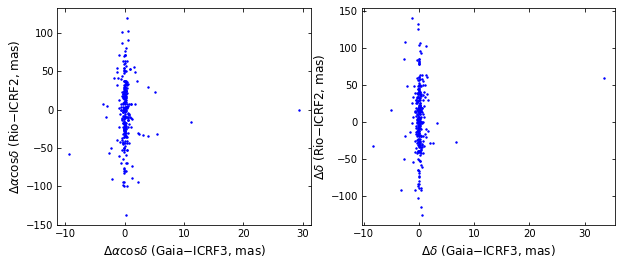

In [12]:
# Compare the position offset
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(-join_tab["dra"], join_tab["dRA"], s=2, color="b")
ax1.scatter(-join_tab["ddec"], join_tab["dDE"], s=2, color="b")

ax0.set_xlabel("$\Delta\\alpha\cos\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\Delta\\alpha\cos\delta$ (Rio$-$ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\Delta\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\Delta\delta$ (Rio$-$ICRF2, mas)", fontsize=12)

plt.subplots_adjust()

Angular separation between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


/Users/Neo/scisoft/opt64/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "hbox" which is no longer supported as of 3.3 and will become an error two minor releases later


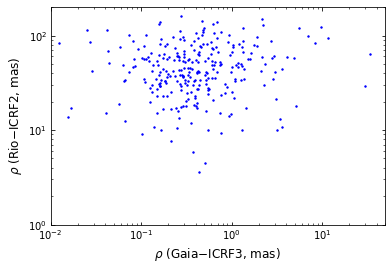

In [13]:
# Angular separation
dpos = np.sqrt(join_tab["dRA"]**2 + join_tab["dDE"]**2)

fig, ax = plt.subplots()
ax.scatter(join_tab["ang_sep"], dpos, s=2, color="b")
ax.set_xlabel("$\\rho$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax.set_ylabel("$\\rho$ (Rio$-$ICRF2, mas)", fontsize=12)

print("Angular separation between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.01, 50])
ax.set_ylim([1, 200])

plt.subplots_adjust()
plt.savefig("../plots/rio-gaia-rho-comparison.eps", hbox="tight")

Obviously, radio-to-optical offsets calculated from Rio survey and ICRF2 catalog is significantly greater than those from Gaia and ICRF3 catalog.

Offset between optical and radio positions
X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2


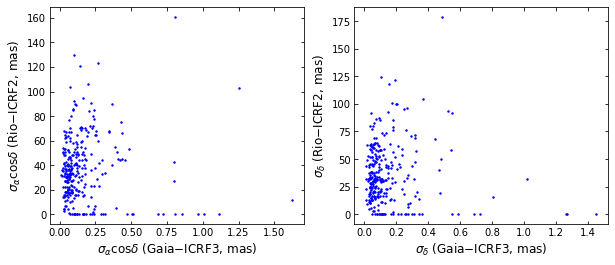

In [14]:
# Compare the position error
print("Offset between optical and radio positions")
print("X-axis: Gaia - ICRF3 SX; y-axis: Rio - ICRF2")

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2)

ax0.scatter(join_tab["ra_err_gedr3"], join_tab["sRA"], s=2, color="b")
ax1.scatter(join_tab["dec_err_gedr3"], join_tab["sDE"], s=2, color="b")

ax0.set_xlabel("$\sigma_\\alpha\cos\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax0.set_ylabel("$\sigma_\\alpha\cos\delta$ (Rio$-$ICRF2, mas)", fontsize=12)

ax1.set_xlabel("$\sigma_\delta$ (Gaia$-$ICRF3, mas)", fontsize=12)
ax1.set_ylabel("$\sigma_\delta$ (Rio$-$ICRF2, mas)", fontsize=12)

plt.subplots_adjust()

The cause of this discrepancy is most likely due to systematic errors in the Rio position, which is similar to those reported by Mignard.